Clustering is used to form meaningful data from the existing variables. Here there is no data to test upon, nor to predict. We classify our results in various different groups which we didn't know existed earlier, and it is up to us to define what these results tell us.

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [2, 3, 4]].values #Here the 1st column of the dataset is CustomerID, which is not required for clustering, along with the other gender columns

# K-Means CLustering

## Elbow method to choose the number of clusters


C:\Users\Atharav Jadhav\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Atharav Jadhav\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Atharav Jadhav\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Atharav Jadhav\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

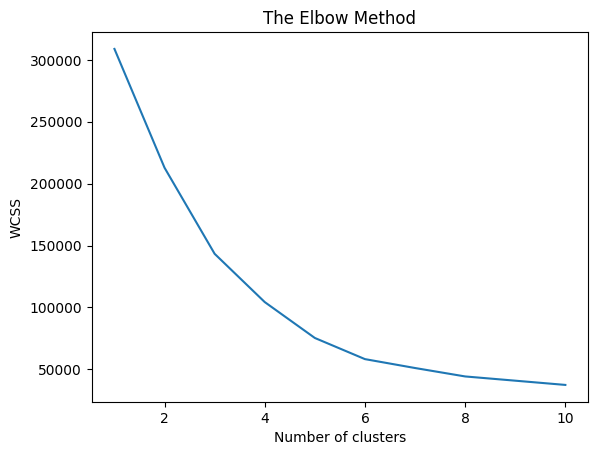

In [3]:
from sklearn.cluster import KMeans
wcss = [] #most important part of the code. This is the within cluster sum of squares. We will use this to find the optimal number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) #42 is just random number. 10 is the max number of clusters we allow.
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #inertia_ is the attribute of the KMeans class. It is the within cluster sum of squares. We append it to the wcss list
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

WARNING: Choose the final number of clusters, here 5, when the slope begins to DECREASE rapidly

Here the number of clusters in beginning is 1. We then take random non-data point, find the maximum distance from it to some other data point. Thier midpoint is now the new centriod. Similar adjustments take place for the future centroid points for the next centroids.

## Training and Printing

In [4]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\Atharav Jadhav\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
for cluster_id in set(y_kmeans):
    print(f"Cluster {cluster_id}:")
    cluster_points = X[y_kmeans == cluster_id]
    for point in cluster_points:
        print(point)
    print("---------------------------")


Cluster 0:
[19 15 39]
[20 16  6]
[31 17 40]
[35 18  6]
[64 19  3]
[67 19 14]
[58 20 15]
[37 20 13]
[35 21 35]
[52 23 29]
[35 24 35]
[46 25  5]
[54 28 14]
[45 28 32]
[40 29 31]
[60 30  4]
[53 33  4]
[49 33 14]
[42 34 17]
[36 37 26]
[65 38 35]
[48 39 36]
[49 39 28]
---------------------------
Cluster 1:
[39 69 91]
[31 70 77]
[40 71 95]
[38 71 75]
[39 71 75]
[31 72 71]
[29 73 88]
[32 73 73]
[35 74 72]
[32 75 93]
[32 76 87]
[28 77 97]
[32 77 74]
[34 78 90]
[39 78 88]
[38 78 76]
[27 78 89]
[30 78 78]
[30 78 73]
[29 79 83]
[31 81 93]
[36 85 75]
[33 86 95]
[32 87 63]
[28 87 75]
[36 87 92]
[30 88 86]
[27 88 69]
[35 93 90]
[32 97 86]
[29 98 88]
[30 99 97]
[ 28 101  68]
[ 36 103  85]
[ 32 103  69]
[ 38 113  91]
[ 35 120  79]
[ 32 126  74]
[ 30 137  83]
---------------------------
Cluster 2:
[23 70 29]
[59 71 11]
[47 71  9]
[25 72 34]
[20 73  5]
[44 73  7]
[19 74 10]
[57 75  5]
[28 76 40]
[25 77 12]
[48 77 36]
[34 78 22]
[43 78 17]
[44 78 20]
[47 78 16]
[37 78  1]
[34 78  1]
[56 79 35]
[19 81  5]

# Heirarchial Clustering

## Dendrograms to check optimal number of clusters

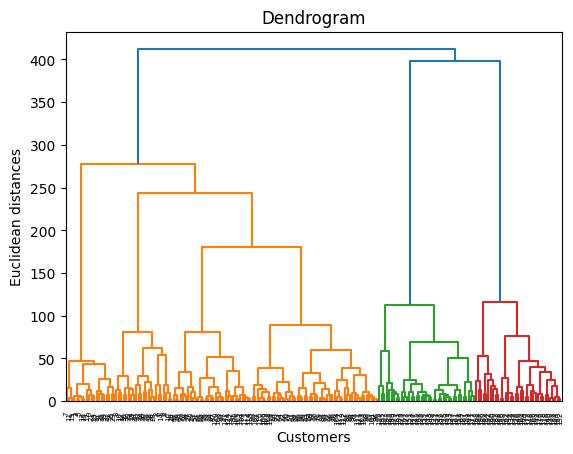

In [5]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

WARNING: We choose the number of clusters based on the maximum distance on the straight lines above, without crossing the horizonatl lines. The number of vertical lines indicate the number of clusters.

Here the straight lines are the Euclidian distance between the 2 clusters. At the beginning, we have n different clusters for n different data points, we then start to group the 2 closest one one by one.

## Training and Printing

In [6]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

C:\Users\Atharav Jadhav\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [8]:
for cluster_id in set(y_kmeans):
    print(f"Cluster {cluster_id}:")
    cluster_points = X[y_kmeans == cluster_id]
    for point in cluster_points:
        print(point)
    print("---------------------------")

Cluster 0:
[19 15 39]
[20 16  6]
[31 17 40]
[35 18  6]
[64 19  3]
[67 19 14]
[58 20 15]
[37 20 13]
[35 21 35]
[52 23 29]
[35 24 35]
[46 25  5]
[54 28 14]
[45 28 32]
[40 29 31]
[60 30  4]
[53 33  4]
[49 33 14]
[42 34 17]
[36 37 26]
[65 38 35]
[48 39 36]
[49 39 28]
---------------------------
Cluster 1:
[39 69 91]
[31 70 77]
[40 71 95]
[38 71 75]
[39 71 75]
[31 72 71]
[29 73 88]
[32 73 73]
[35 74 72]
[32 75 93]
[32 76 87]
[28 77 97]
[32 77 74]
[34 78 90]
[39 78 88]
[38 78 76]
[27 78 89]
[30 78 78]
[30 78 73]
[29 79 83]
[31 81 93]
[36 85 75]
[33 86 95]
[32 87 63]
[28 87 75]
[36 87 92]
[30 88 86]
[27 88 69]
[35 93 90]
[32 97 86]
[29 98 88]
[30 99 97]
[ 28 101  68]
[ 36 103  85]
[ 32 103  69]
[ 38 113  91]
[ 35 120  79]
[ 32 126  74]
[ 30 137  83]
---------------------------
Cluster 2:
[23 70 29]
[59 71 11]
[47 71  9]
[25 72 34]
[20 73  5]
[44 73  7]
[19 74 10]
[57 75  5]
[28 76 40]
[25 77 12]
[48 77 36]
[34 78 22]
[43 78 17]
[44 78 20]
[47 78 16]
[37 78  1]
[34 78  1]
[56 79 35]
[19 81  5]